![](824093-titanic-wallpaper-2880x1920-for-hd.jpg)

# Data Exploration

In [1]:
import pandas as pd
import numpy as np

In [2]:
titanic = pd.read_csv("tested.csv")

In [3]:
print(titanic.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   

    Ticket     Fare Cabin Embarked  
0   330911   7.8292   NaN        Q  
1   363272   7.0000   NaN        S  
2   240276   9.6875   NaN        Q  
3   315154   8.6625   NaN        S  
4  3101298  12.2875   NaN        S  


In [4]:
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [5]:
print(titanic.isnull().sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64


In [6]:
print(titanic.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB
None


In [7]:
titanic.shape

(418, 12)

In [8]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [9]:
titanic = titanic.drop(columns=['Cabin'])
titanic = titanic.drop(columns=['Name','Ticket'])

In [10]:
titanic.shape

(418, 9)

In [11]:
titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch',
       'Fare', 'Embarked'],
      dtype='object')

In [12]:
# Check for duplicate rows in the entire DataFrame
duplicate_rows = titanic.duplicated()

# Show the rows that are duplicates
print(duplicate_rows)

0      False
1      False
2      False
3      False
4      False
       ...  
413    False
414    False
415    False
416    False
417    False
Length: 418, dtype: bool


In [13]:
print(titanic.describe())

       PassengerId    Survived      Pclass         Age       SibSp  \
count   418.000000  418.000000  418.000000  332.000000  418.000000   
mean   1100.500000    0.363636    2.265550   30.272590    0.447368   
std     120.810458    0.481622    0.841838   14.181209    0.896760   
min     892.000000    0.000000    1.000000    0.170000    0.000000   
25%     996.250000    0.000000    1.000000   21.000000    0.000000   
50%    1100.500000    0.000000    3.000000   27.000000    0.000000   
75%    1204.750000    1.000000    3.000000   39.000000    1.000000   
max    1309.000000    1.000000    3.000000   76.000000    8.000000   

            Parch        Fare  
count  418.000000  417.000000  
mean     0.392344   35.627188  
std      0.981429   55.907576  
min      0.000000    0.000000  
25%      0.000000    7.895800  
50%      0.000000   14.454200  
75%      0.000000   31.500000  
max      9.000000  512.329200  


## Handling missing Values

In [14]:
titanic['Age']=titanic['Age'].fillna(titanic['Age'].mean())
titanic['Fare']=titanic['Fare'].fillna(titanic['Age'].mean())


In [15]:
titanic['Embarked'].mode()[0]

'S'

In [16]:
titanic['Embarked'] = titanic['Embarked'].fillna(titanic['Embarked'].mode())

# Exploration by Visulaization

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline



In [18]:
survival_analyses = titanic['Survived'].value_counts()
print(survival_analyses)


0    266
1    152
Name: Survived, dtype: int64


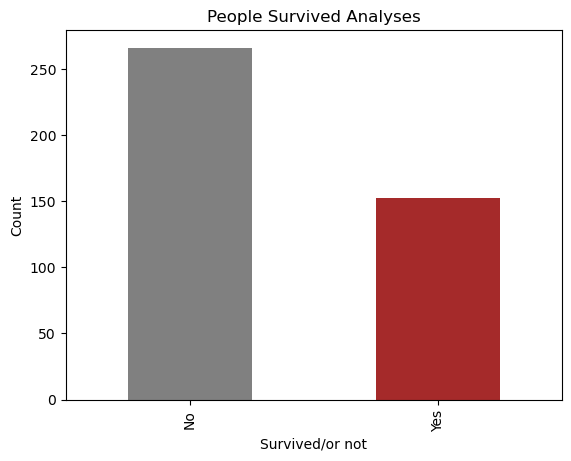

In [19]:
survival_analyses.plot(kind='bar',color=['grey','brown'])
plt.xlabel('Survived/or not')
plt.ylabel('Count')
plt.xticks([0, 1], ['No', 'Yes'])  # Label the x-axis
plt.title('People Survived Analyses')
plt.show()

In [20]:
sex = titanic['Sex'].value_counts()
print(sex)

male      266
female    152
Name: Sex, dtype: int64


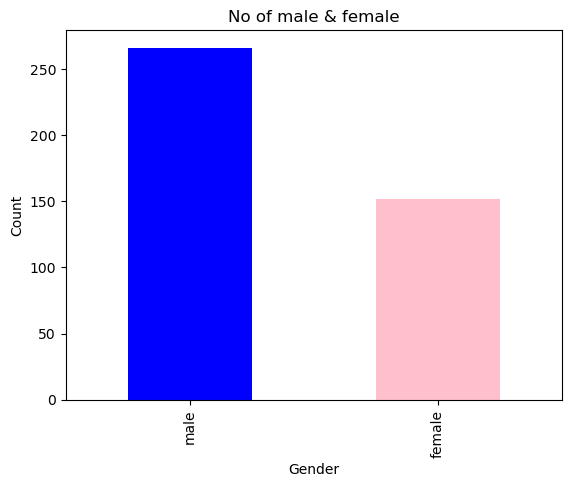

In [21]:
sex.plot(kind='bar',color=['blue','pink'])
plt.xlabel('Gender')
plt.ylabel('Count')
plt.xticks([0, 1], ['male', 'female'])  # Label the x-axis
plt.title('No of male & female')
plt.show()

In [22]:
sibling = titanic['SibSp'].value_counts()
print(sibling)

0    283
1    110
2     14
3      4
4      4
8      2
5      1
Name: SibSp, dtype: int64


In [24]:
Parch = titanic['Parch'].value_counts()
print(Parch)


0    324
1     52
2     33
3      3
4      2
9      2
6      1
5      1
Name: Parch, dtype: int64


In [26]:
Embarked = titanic['Embarked'].value_counts()
print(Embarked)

S    270
C    102
Q     46
Name: Embarked, dtype: int64


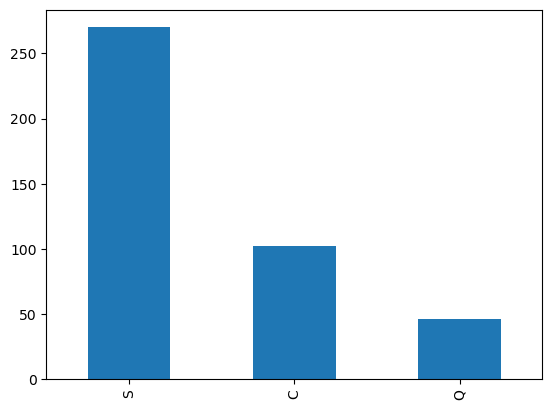

In [27]:
Embarked.plot(kind = 'bar')
plt.show()

<AxesSubplot:xlabel='Survived', ylabel='count'>

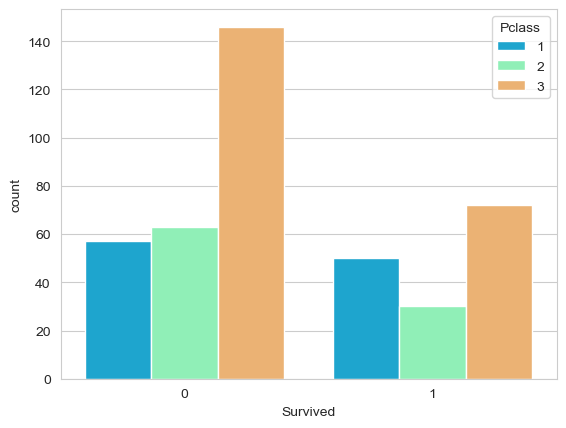

In [28]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=titanic,palette='rainbow')

<AxesSubplot:xlabel='Survived', ylabel='count'>

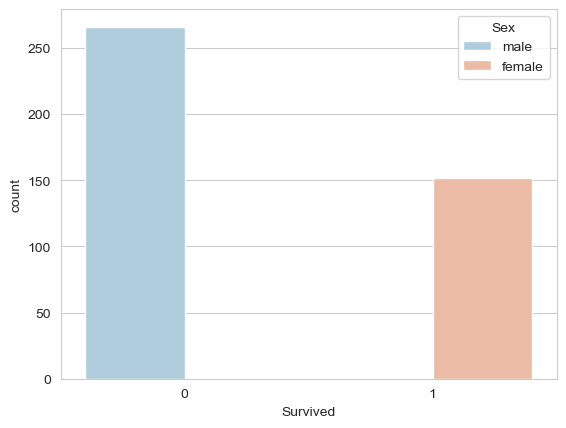

In [29]:

sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=titanic,palette='RdBu_r')

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

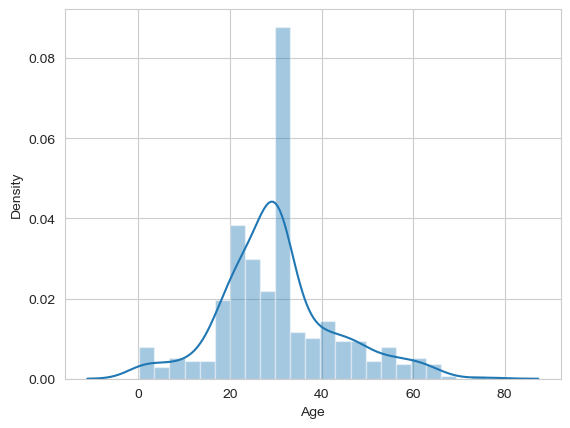

In [30]:
sns.distplot(titanic['Age'])

C:\Anaconda\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

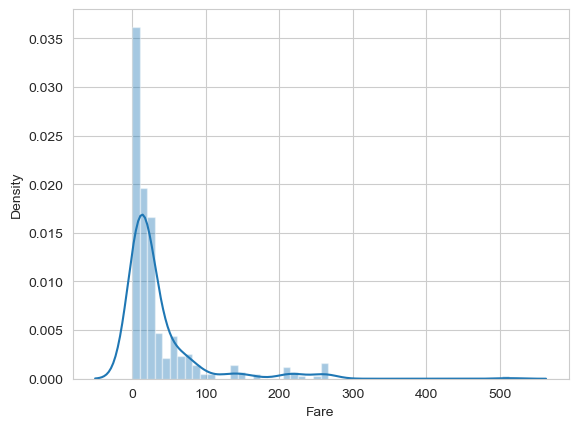

In [31]:
sns.distplot(titanic['Fare'])

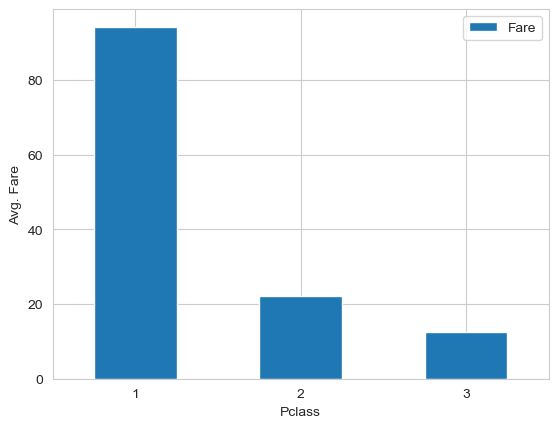

In [32]:
class_fare = titanic.pivot_table(index='Pclass', values='Fare')
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Avg. Fare')
plt.xticks(rotation=0)
plt.show()


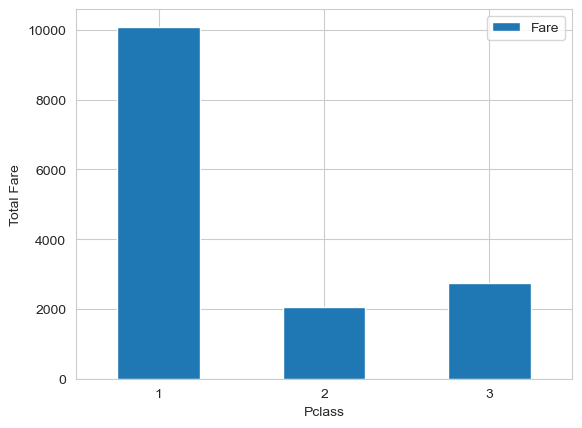

In [33]:
class_fare = titanic.pivot_table(index='Pclass', values='Fare',aggfunc=np.sum)
class_fare.plot(kind='bar')
plt.xlabel('Pclass')
plt.ylabel('Total Fare')
plt.xticks(rotation=0)
plt.show()


In [34]:
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34.5,0,0,7.8292,Q
1,893,1,3,female,47.0,1,0,7.0000,S
2,894,0,2,male,62.0,0,0,9.6875,Q
3,895,0,3,male,27.0,0,0,8.6625,S
4,896,1,3,female,22.0,1,1,12.2875,S


In [36]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    object 
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(2)
memory usage: 29.5+ KB


# Label Encoding

In [38]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex','Embarked']
encoder = LabelEncoder()

for col in cols:
    titanic[col] = encoder.fit_transform(titanic[col])
titanic.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.5,0,0,7.8292,1
1,893,1,3,0,47.0,1,0,7.0000,2
2,894,0,2,1,62.0,0,0,9.6875,1
3,895,0,3,1,27.0,0,0,8.6625,2
4,896,1,3,0,22.0,1,1,12.2875,2


# Train Test Split

In [46]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Assuming your dataset is stored in a DataFrame named 'df'
X = titanic[['PassengerId', 'Sex', 'Age']]
Y = titanic['Survived']

# Split the dataset into training and testing sets (e.g., 80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

# Create a Logistic Regression model
lr= LogisticRegression()

# Train the model on the training data
lr.fit(X_train, y_train)

# Make predictions on the test data
pred_lr = lr.predict(X_test)

# Evaluate the model's performance
accuracy = accuracy_score(y_test, pred_lr)
report = classification_report(y_test, pred_lr)

print(f"Accuracy: {accuracy*100}")
print("Classification Report:\n", report)

Accuracy: 100.0
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        58
           1       1.00      1.00      1.00        26

    accuracy                           1.00        84
   macro avg       1.00      1.00      1.00        84
weighted avg       1.00      1.00      1.00        84



In [47]:
titanic['Survived'].head()

0    0
1    1
2    0
3    0
4    1
Name: Survived, dtype: int64

In [48]:
titanic{
    'PassengerId':839,
    'Sex':0
    'Age':45
}
print(f'{lr.predict[titanic]}')

SyntaxError: invalid syntax (3927721151.py, line 1)

In [49]:
# Define passenger's information as a dictionary
passenger_info = {
    'PassengerId': [839],
    'Sex': [0],
    'Age': [45]
}

# Create a DataFrame from the passenger_info dictionary
passenger_df = pd.DataFrame(passenger_info)

# Use the trained logistic regression model to make predictions
predictions = lr.predict(passenger_df)

# Print the prediction result
if predictions[0] == 0:
    print("The passenger did not survive.")
else:
    print("The passenger survived.")

The passenger survived.
